#### Importing all libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading dataset

In [23]:
data=pd.read_csv(r"C:\Users\tessl\Downloads\titanic_dataset (1).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.info()    ## checking for datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data.isna().sum()                    ## Finding null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
data.columns                        ### Checking for columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
data['Age'].fillna(data['Age'].median(), inplace=True)       ### Filling the age with median values

In [28]:
data=data.drop(['Cabin','Name','PassengerId','Ticket','Embarked'],axis=1)     # Dropping irrelavant columns

In [29]:
data1=pd.get_dummies(data)                                # Performing one hot encoding for gender

In [30]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 43.6 KB


In [32]:
corr= data1.corr()                                # performing corellation

[]

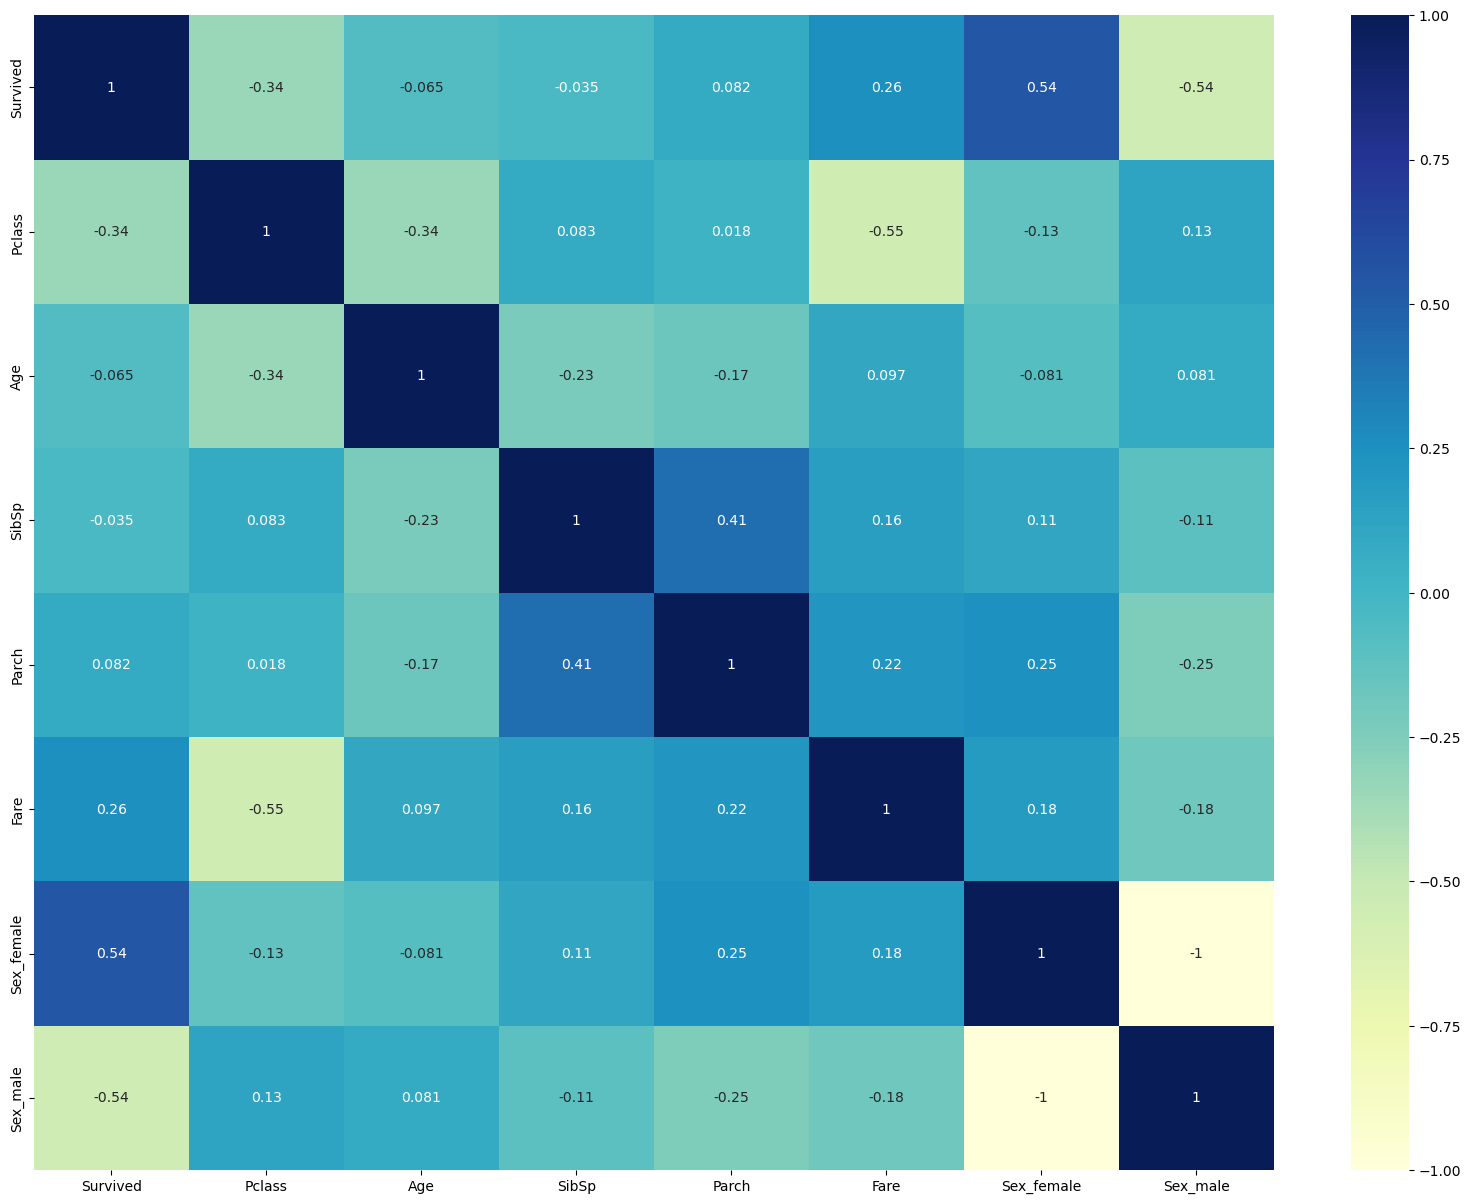

In [33]:
plt.figure(figsize=(20,15))                         ## Ploting heatmap
sns.heatmap(corr,annot=True, cmap='YlGnBu')
plt.plot()

In [34]:
x= data1.drop('Survived',axis=1)                    # taking survived as target column
y= data1['Survived']

In [35]:
from sklearn.model_selection import train_test_split                                    # dividing into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

### SVM Model

In [45]:
from sklearn.svm import SVC                               # importing from library

In [46]:
svm_cls = SVC(kernel='linear')                           # using linear predicting values
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score   # importing libraries for accuracy and confusion

In [48]:
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

### KNN Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier               # importing libraries for KNeighborsClassifier

In [64]:
metric_k=[]                                                       # making an empty list for values
neighbors=np.arange(3,25)

In [65]:
for k in neighbors:                                               # predicting values using euclidean method
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

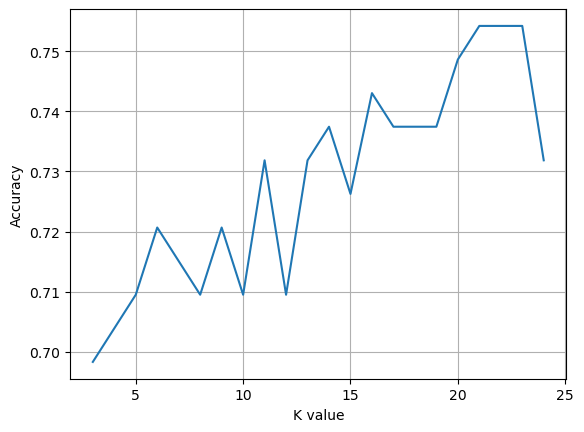

In [66]:
plt.plot(neighbors,metric_k)                                 # ploting grid to find the accuracy
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 24,metric = 'euclidean')            # giving highest value for n_neighbors
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
confusion_matrix(y_test,y_prediction)                                # confusion matrix

array([[98,  7],
       [41, 33]], dtype=int64)

In [70]:
print("accuracy is:",accuracy_score(y_test,y_prediction))           # accuracy value


accuracy is: 0.7318435754189944


## SVM Model shows better accuracy than KNN as it has value .78 where as KNN only has .73 accuracy score

### Hold out Technique

In [74]:
from sklearn.model_selection import train_test_split                      # same as above, data taken for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [75]:
from sklearn.linear_model import LogisticRegression                 # performing logistics regression
LR_model=LogisticRegression()
LR_model=LR_model.fit(x_train,y_train)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
score_LR = LR_model.score(x_test,y_test)
score_LR

0.8044692737430168

### K-Fold Cross Validation

In [80]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

#### giving all the values fully for training and testing 

In [81]:
for train_index,test_index in kfold_validator.split(x,y):
    print("Training Index: ",train_index)
    print("Validation Index: ",test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [82]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(LR_model,x,y,cv=kfold_validator)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [83]:
cv_result       # values of each fold

array([0.77777778, 0.80898876, 0.76404494, 0.78651685, 0.7752809 ,
       0.78651685, 0.76404494, 0.76404494, 0.84269663, 0.80898876])

#### Finding mean of all folds

In [84]:
np.mean(cv_result)

0.7878901373283396

### Stratified cross Validation

In [85]:
from sklearn.model_selection import StratifiedKFold             # importing libraries and spliting into 10 groups
skfold_validator=StratifiedKFold(n_splits=10)

In [86]:
for train_index,test_index in kfold_validator.split(x,y):       # whole values are given for training and testing
    print("Training Index: ",train_index)
    print("Validation Index: ",test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [87]:
skcv_result=cross_val_score(LR_model,x,y,cv=skfold_validator)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [88]:
skcv_result                   ##  values of 10 folds

array([0.78888889, 0.78651685, 0.74157303, 0.82022472, 0.80898876,
       0.76404494, 0.79775281, 0.7752809 , 0.79775281, 0.82022472])

In [89]:
np.mean(skcv_result)           ## average value

0.7901248439450687

In [ ]:
### we can see that the mean value of stratified K-fold is 0.79 which is  slightly greater than 0.78 of K-fold 